In [2]:
import numpy as np

In [4]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x));

def sigmoidprime(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

In [37]:
class Perceptron:
    
    def __init__(self, input_units, alpha):
        
        # Number of input units
        self.input_units = input_units
        
        # Initialize random weights and a random bias term
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        
        # Define the learning rate as prescribed by the SingleLayerMLP module.
        self.alpha = alpha
        
    def forward_step(self, input, gradient=False):
        
        # Compute weighted sum of inputs and weights
        weighted_sum =  np.dot(input, self.weights) + self.bias
        
        # If gradient is not wanted, return sigmoid activation. Otherwise, return sigmoid prime of weighted sum.
        # (gradient of the drive is required for the hidden layer in the backpropagation step)
        if gradient:
            return sigmoidprime(weighted_sum);
        else:
            return sigmoid(weighted_sum)

    def update(self, input, delta):
        
        # Compute the change in weights
        delta_weights = self.alpha * delta * input;
        
        # Compute the change in bias
        delta_bias = self.alpha * delta * 1;
        
        # Update the weights and bias
        self.weights -= delta_weights;
        self.bias -= delta_bias;

In [38]:
class SingleLayerMLP:
    def __init__(self, num_inputs, num_hidden, num_outputs, alpha=1):
        self.num_inputs = num_inputs;
        self.num_hidden = num_hidden;
        self.num_outputs = num_outputs;
        self.alpha = alpha;
        
        # Create a hidden layer of perceptrons, all with the required number of inputs.
        self.hidden_layer = [Perceptron(num_inputs, self.alpha) for i in range(num_hidden)];
        
        # Output layer (only defined for one output for the purpose of this problem)
        self.out_layer = Perceptron(num_hidden, self.alpha);
        
        # Variable to store hidden layer activation for use in backpropagation
        self.hidden_outputs = np.zeros(self.num_hidden);
        
    def forward_step(self, inputs, gradient=False):
        
        # Compute hidden layer activation by computing activation for each perceptron in hidden layer
        self.hidden_outputs = np.array([self.hidden_layer[i].forward_step(inputs) for i in range(self.num_hidden)]);
        
        # Use hidden layer activation as input to outer layer to compute activation of output layer
        return self.out_layer.forward_step(self.hidden_outputs, gradient);
    
    def backward_step(self, inputs, loss):

        # Compute the delta update for the outer layer based on the error signal
        out_delta = loss * self.out_layer.forward_step(self.hidden_outputs, gradient=True);

        # For each perceptron in hidden layer
        for i in range(len(self.hidden_layer)):
            
            # Compute the delta for hidden layer using:
            # delta from output layer
            # weight from connection between this hidden node and output layer
            # gradient of the drive (i.e., weighted sum) for this hidden node
            hidden_delta = out_delta * self.out_layer.weights[i] * self.hidden_layer[i].forward_step(inputs,gradient=True);
            
            # Update the hidden node parameters
            self.hidden_layer[i].update(inputs, hidden_delta);
        
        # Update the output node parameters
        self.out_layer.update(self.hidden_outputs, out_delta);

        
        
        
        
        

In [39]:
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])

# These are possible labels form some logical gates.
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

In [73]:
# Now let's train the perceptron.

# Choose which target you want to train on.
t = t_nor

# Initialize a perceptron.
perceptron = SingleLayerMLP(2,4,1, alpha=1);

# Initialize lists to store steps and performance.
steps = []
accuracies = []
losses = [];

# Set a number of epochs to train for
n_epochs = 400;

for i in range(n_epochs):
    steps.append(i)
    
    # Randomize the order of the training points each epoch by permuting the indices
    training_schedule = np.random.permutation(len(x));
    total_loss = 0;
    total_correct = 0;
    
    # Selecting from the permuted indices gives us a random training schedule
    for j in training_schedule:
        
        # Compute the output of the network on the input
        out = perceptron.forward_step(x[j]);
        
        # Compute difference between target and output (error signal)
        diff = out - t[j];
        
        # Perform backpropagation by passing error signal
        perceptron.backward_step(x[j], diff);
        
        # Add to total square loss (mean calculated later)
        total_loss += diff**2;
        
        # Determine network prediction (1 if output is greater than 0.5, 0 otherwise);
        pred = 1 if out > 0.5 else 0;
        
        # Find total correct (accuracy calculated later)
        total_correct += int(pred == t[j]);
    
    # Mean square loss for this epoch
    losses.append(total_loss/len(t));
    
    # Mean accuracy for this epoch
    accuracies.append(total_correct/len(t));

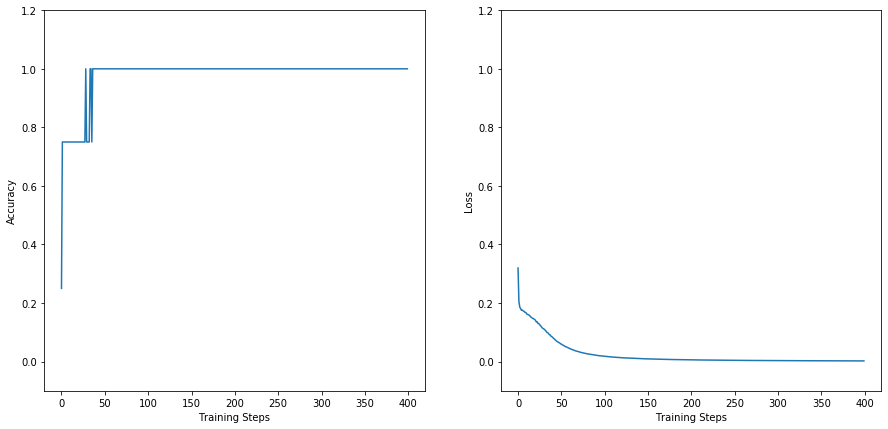

In [74]:
# Lastly let's plot the training progress.
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))

# Plot mean accuracy against epochs
ax = plt.subplot(1,2,1);
ax.plot(steps, accuracies)
ax.set_xlabel("Training Steps")
ax.set_ylabel("Accuracy")
ax.set_ylim([-0.1, 1.2])

# Plot mean square loss against epochs
ax = plt.subplot(1,2,2);
ax.plot(steps, losses)
ax.set_xlabel("Training Steps")
ax.set_ylabel("Loss")
ax.set_ylim([-0.1, 1.2])

plt.show()